In [1]:
import pandas as pd
import gc
import matplotlib.pyplot as plt
from collections import Counter
pd.set_option('display.max_columns',100)
#显示所有行
pd.set_option('display.max_rows',100)
#设置数据的显示长度，默认为50
pd.set_option('max_colwidth',100)

In [2]:
data_root={
    "train_path":"../data/train_set.csv",
    "test_path":"../data/test_a.csv",
    "sub_path":"../data/test_a_sample_submit.csv"
}
train=pd.read_csv(data_root["train_path"], sep='\t')
test=pd.read_csv(data_root["test_path"])
sub=pd.read_csv(data_root["sub_path"])

In [3]:
train.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 1519 2058 3912 2465 2410 1219 6654 7539 264 2456 481...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 5445 26 6663 5530 4149 2986 1746 5491 3659 2662 3002...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6301 2465 6088 5858 4333 1386 1401 5780 290 541 635...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 5492 7006 316 2828 2058 2331 2465 5410 4646 6983 6781...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5192 4876 3585 4298 5659 2109 1043 3994 7393 5099 3...


### 句子长度分析

In [4]:
train["text_len"]=train.text.apply(lambda x:len(x.split(" ")))

In [5]:
train["text_len"].describe()

count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64

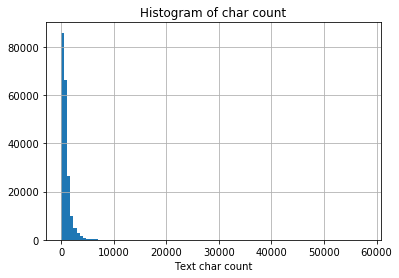

In [6]:
train.text_len.hist(bins=100)
plt.xlabel('Text char count')
plt.title("Histogram of char count");

### 新闻类别分布

In [7]:
df_label=train.groupby("label").agg({"text":["count"],"text_len":["max","min","mean"]})

In [8]:
df_label.head()

text text_len                 
       count      max min         mean
label                                 
0      38918    18587  12   878.717663
1      36945    57921   9   870.363676
2      31425    41894   2  1014.429562
3      22133    10817  17   784.774726
4      15016    14928  25   649.705647

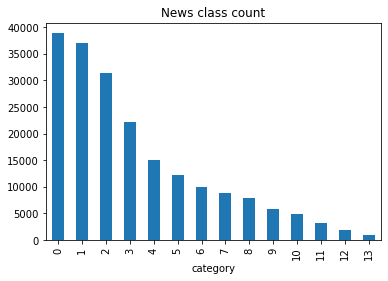

In [9]:
train["label"].value_counts().plot(kind="bar")
plt.title('News class count')
plt.xlabel("category");

### 字符分布统计

In [11]:

all_lines=" ".join(list(train["text"]))
word_count=Counter(all_lines.split(" "))

In [12]:
word_count.most_common(10)

[('3750', 7482224),
 ('648', 4924890),
 ('900', 3262544),
 ('3370', 2020958),
 ('6122', 1602363),
 ('4464', 1544962),
 ('7399', 1455864),
 ('4939', 1387951),
 ('3659', 1251253),
 ('4811', 1159401)]

In [13]:
len(word_count)

6869

In [14]:
word_count.most_common()[-5:]

[('155', 1), ('1415', 1), ('1015', 1), ('4468', 1), ('3133', 1)]

#### 统计了不同字符在句子中出现的次数

In [15]:
train['text_unique'] = train['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(train['text_unique']))
word_count = Counter(all_lines.split(" "))

In [16]:
for k,v in word_count.most_common(10):
    print("字符编号为 {:>4} 在所有句子中的比例为: {:.2%}".format(k,v/200000))

字符编号为 3750 在所有句子中的比例为: 99.00%
字符编号为  900 在所有句子中的比例为: 98.83%
字符编号为  648 在所有句子中的比例为: 95.99%
字符编号为 2465 在所有句子中的比例为: 88.66%
字符编号为 6122 在所有句子中的比例为: 88.27%
字符编号为 7399 在所有句子中的比例为: 88.12%
字符编号为 4811 在所有句子中的比例为: 84.69%
字符编号为 4464 在所有句子中的比例为: 83.58%
字符编号为 1699 在所有句子中的比例为: 82.43%
字符编号为 3659 在所有句子中的比例为: 81.59%


### 本章作业

1. 假设字符3750，字符900和字符648是句子的标点符号，请分析赛题每篇新闻平均由多少个句子构成？

In [18]:
for symbol in ["3750","900","648"]:
    col_name="sentence_count_by_{}".format(symbol)
    train[col_name]=train.text.apply(lambda x:len(x.split(symbol)))

In [19]:
 train[["sentence_count_by_3750","sentence_count_by_900","sentence_count_by_648"]].head()

,sentence_count_by_3750,sentence_count_by_900,sentence_count_by_648
0,65,31,27
1,26,15,12
2,28,8,22
3,87,28,45
4,12,8,11


count    200000.00000
mean         38.41112
std          40.87367
min           1.00000
25%          14.00000
50%          27.00000
75%          49.00000
max        1960.00000
Name: sentence_count_by_3750, dtype: float64


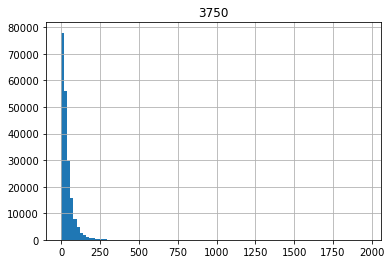

count    200000.000000
mean         17.335255
std          18.047099
min           1.000000
25%           7.000000
50%          12.000000
75%          22.000000
max         735.000000
Name: sentence_count_by_900, dtype: float64


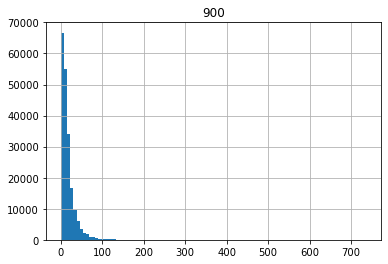

count    200000.000000
mean         27.055995
std          31.958496
min           1.000000
25%           8.000000
50%          18.000000
75%          35.000000
max        1394.000000
Name: sentence_count_by_648, dtype: float64


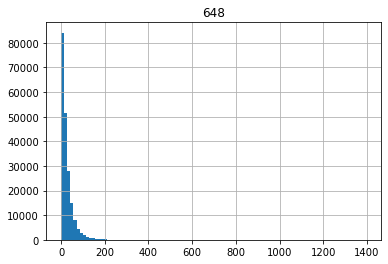

In [20]:
for symbol in ["3750","900","648"]:
    col_name="sentence_count_by_{}".format(symbol)
    print(train[col_name].describe())
    train[col_name].hist(bins=100)
    plt.title(symbol)
    plt.show()

2. 统计每类新闻中出现次数对多的字符

In [21]:
def get_word_group_count():
    word_group_count={}
    for name,group in train[["label","text"]].groupby("label"):
        all_lines=" ".join(list(group.text))
        word_count=Counter(all_lines.split(" "))
        word_group_count[name]=word_count
    return word_group_count

In [22]:
word_group_count=get_word_group_count()

In [23]:
for i in range(14):
    print("标签为第{:>2d}组，最多的五个单词为 {} ".format(i,word_group_count[i].most_common(5)))

标签为第 0组，最多的五个单词为 [('3750', 1267331), ('648', 967653), ('900', 577742), ('3370', 503768), ('4464', 307431)] 
标签为第 1组，最多的五个单词为 [('3750', 1200686), ('648', 714152), ('3370', 626708), ('900', 542884), ('4464', 445525)] 
标签为第 2组，最多的五个单词为 [('3750', 1458331), ('648', 974639), ('900', 618294), ('7399', 351894), ('6122', 343850)] 
标签为第 3组，最多的五个单词为 [('3750', 774668), ('648', 494477), ('900', 298663), ('6122', 187933), ('4939', 173606)] 
标签为第 4组，最多的五个单词为 [('3750', 360839), ('648', 231863), ('900', 190842), ('4411', 120442), ('7399', 86190)] 
标签为第 5组，最多的五个单词为 [('3750', 715740), ('648', 329051), ('900', 305241), ('6122', 159125), ('5598', 136713)] 
标签为第 6组，最多的五个单词为 [('3750', 469540), ('648', 345372), ('900', 222488), ('6248', 193757), ('2555', 175234)] 
标签为第 7组，最多的五个单词为 [('3750', 428638), ('648', 262220), ('900', 184131), ('3370', 159156), ('5296', 132136)] 
标签为第 8组，最多的五个单词为 [('3750', 242367), ('648', 202399), ('900', 92207), ('6122', 57345), ('4939', 56147)] 
标签为第 9组，最多的五个单词为 [('3750', 178783), ('

### 其他思考
- 最后一个字符,是否截断：给出假设如果没有被截断，那么末尾那个数字应该会有很大一部分是一样的。



In [25]:
train["last_word"]=train.text.apply(lambda x: x.split(" ")[-1])
last_word_count=Counter(train["last_word"])

In [85]:
last_word_count.most_common(10)

[('900', 85040),
 ('2662', 39273),
 ('885', 14473),
 ('1635', 7379),
 ('2465', 7076),
 ('57', 3284),
 ('3231', 2758),
 ('1633', 2706),
 ('3568', 1504),
 ('2265', 1389)]

In [32]:
for symbol in ["3750","900","648"]:
    print(last_word_count[symbol])

17
85040
17


所以更倾向于900是句号

- 定义一个句子分析类

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


class SentenceAnalysis:
    def __init__(self, data_path, n_classes=None, with_label=True):
        self.data_path = data_path
        self.with_label = with_label  # 测试集无标签导入
        self.n_classes = n_classes
        self.load_dataset()

    @property
    def data(self):
        if self.with_label:
            return self.X, self.Y
        else:
            return self.X

    def load_dataset(self):
        if self.with_label:
            train = pd.read_csv(self.data_path, sep='\t')
            self.X = train[[col for col in train.columns if col != "label"]]
            self.Y = train["label"]
        else:
            test = pd.read_csv(self.data_path)
            self.X = test
            self.Y = None

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, index):
        """Generate one  of data"""
        x = self.X.iloc[int(index)]
        if self.with_label:
            y = self.Y[int(index)]
            # y=one_hot(y,self.n_classes)
            return x, y
        else:
            return x

    def passage_length_ana(self, show_describe=True, show_hist=False):
        """
        句子长度分析
        """
        df = self.X.copy()
        df["text_len"] = df.text.apply(lambda x: len(x.split(" ")))
        if show_describe:
            print(df["text_len"].describe())
        if show_hist:
            df.text_len.hist(bins=100)
            plt.xlabel('Text char count')
            plt.title("Histogram of char count");
        return df["text_len"]

    def show_hist(self, data, bins=100, title="Not define.", xlabel="no xlabel."):
        data.hist(bins=bins)
        plt.xlabel(xlabel)
        plt.title(title);
        return

    def label_distribution(self, show_bar=True, title='class count', xlabel="category"):
        """
        label分布的分析
        """
        if not self.with_label:
            print("没有可用的标签！")
            return
        df = self.X.copy()
        df["label"] = self.Y.values
        df_label = df.groupby("label").agg({"text": ["count"]})
        if show_bar:
            df["label"].value_counts().plot(kind="bar")
            plt.title(title)
            plt.xlabel(xlabel);
        return df_label

    def word_distribution(self, show_most=1, show_least=1):
        """
        字符分布
        """
        show_most, show_least = int(show_most), int(show_least)
        df = self.X.copy()
        all_lines = " ".join(list(df["text"]))
        word_count = Counter(all_lines.split(" "))
        if show_most > 0:
            print("最多的{}个字符:".format(show_most))
            print(word_count.most_common(int(show_most)))
        if show_least > 0:
            print("最少的{}个字符:".format(show_least))
            print(word_count.most_common()[-int(show_least):])
        print("所有文档中拥有字符数： {}".format(len(word_count)))
        return word_count

    def word_in_sentece_distribution(self, show_most=1, show_least=0):
        """
        统计了不同字符在句子中出现的次数
        """
        show_most, show_least = int(show_most), int(show_least)
        df = self.X.copy()
        df['text_unique'] = df['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
        all_lines = ' '.join(list(df['text_unique']))
        word_count = Counter(all_lines.split(" "))
        if show_most > 0:
            print("最多的{}个字符:".format(show_most))
            for k, v in word_count.most_common(show_most):
                print("字符编号为 {:>4} 在所有句子中的比例为: {:.2%}".format(k, v / self.X.shape[0]))
        if show_least > 0:
            print("最少的{}个字符:".format(show_least))
            for k, v in word_count.most_common()[-int(show_least):]:
                print("字符编号为 {:>4} 在所有句子中的比例为: {:.2%}".format(k, v / self.X.shape[0]))
        return word_count

    def word_groupbylabel_count(self, show_most=1):
        """
        统计每类新闻中出现次数最多的字符
        """
        show_most = int(show_most)
        if not self.with_label:
            print("没有可用的标签！")
            return
        df = self.X.copy()
        df["label"] = self.Y.values
        word_group_count = {}
        for name, group in df[["label", "text"]].groupby("label"):
            all_lines = " ".join(list(group.text))
            word_count = Counter(all_lines.split(" "))
            word_group_count[name] = word_count
        if show_most > 0:
            if not self.n_classes:
                self.n_classes = self.Y.nunique()
            for i in range(self.n_classes):
                print("标签为第{:>2d}组，最多的{}个单词为 {} ".format(i, show_most, word_group_count[i].most_common(show_most)))
        return word_group_count

    def last_word_ana(self, show_most=1, show_least=1):
        """
        句尾分析
        """
        show_most, show_least = int(show_most), int(show_least)
        df = self.X.copy()
        df["last_word"] = df.text.apply(lambda x: x.split(" ")[-1])
        last_word_count = Counter(df["last_word"])
        if show_most > 0:
            print("最多的{}个字符:".format(show_most))
            print(last_word_count.most_common(int(show_most)))
        if show_least > 0:
            print("最少的{}个字符:".format(show_least))
            print(last_word_count.most_common()[-int(show_least):])
        print("所有文档中不同的最后一个字符数： {}".format(len(last_word_count)))
        return last_word_count


In [2]:
train_path="../data/train_set.csv"
sentence_train=SentenceAnalysis(train_path,n_classes=14,with_label=True)

In [88]:
# 功能展示
# __getitem__
sentence_train[1]
# __len__
len(sentence_train)
# data
train_X,train_y=sentence_train.data
# 文章长度分析
df_length=sentence_train.passage_length_ana()
# 辅助的作图
sentence_train.show_hist(df_length,100,'Text char count',"Histogram of char count")
# 新闻类别分布
df_label=sentence_train.label_distribution()
# 字符个数分布
word_dict=sentence_train.word_distribution()
# 不同字符在句子中出现的次数
word_in_sentece_dict=sentence_train.word_in_sentece_distribution()
# 统计每类标签中出现次数最多的字符
word_group_count=sentence_train.word_groupbylabel_count()
# 句尾分析
last_word_count=sentence_train.last_word_ana()

In [17]:
sentence_train[1]

(text    4464 486 6352 5619 2465 4802 1452 3137 5778 54...
 Name: 1, dtype: object,
 11)

In [16]:
len(sentence_train)

200000

In [13]:
train_X,train_y=sentence_train.data

In [14]:
train_X

,text
0,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...
...,...
199995,307 4894 7539 4853 5330 648 6038 4409 3764 603...
199996,3792 2983 355 1070 4464 5050 6298 3782 3130 68...
199997,6811 1580 7539 1252 1899 5139 1386 3870 4124 1...
199998,6405 3203 6644 983 794 1913 1678 5736 1397 191...


In [15]:
train_y

0          2
1         11
2          3
3          2
4          3
          ..
199995     2
199996     2
199997    11
199998     2
199999     3
Name: label, Length: 200000, dtype: int64

In [10]:
df_length=sentence_train.passage_length_ana()

count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64


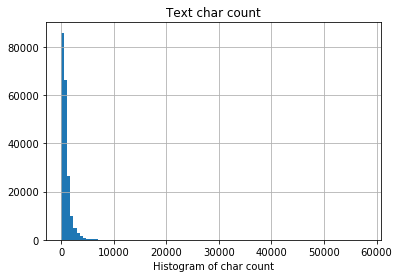

In [12]:
sentence_train.show_hist(df_length,100,'Text char count',"Histogram of char count")

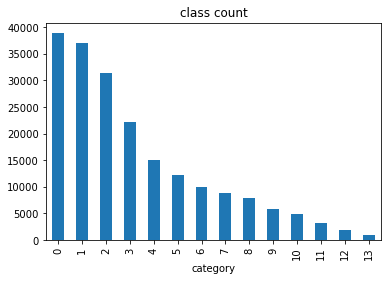

In [8]:
df_label=sentence_train.label_distribution()

In [6]:
word_dict=sentence_train.word_distribution(5,5)

[('3750', 7482224), ('648', 4924890), ('900', 3262544), ('3370', 2020958), ('6122', 1602363)]
[('155', 1), ('1415', 1), ('1015', 1), ('4468', 1), ('3133', 1)]
所有文档中拥有字符数： 6869


In [5]:
word_in_sentece_dict=sentence_train.word_in_sentece_distribution(5)

最多的5个字符:
字符编号为 3750 在所有句子中的比例为: 99.00%
字符编号为  900 在所有句子中的比例为: 98.83%
字符编号为  648 在所有句子中的比例为: 95.99%
字符编号为 2465 在所有句子中的比例为: 88.66%
字符编号为 6122 在所有句子中的比例为: 88.27%


In [4]:
word_group_count=sentence_train.word_groupbylabel_count(5)

标签为第 0组，最多的5个单词为 [('3750', 1267331), ('648', 967653), ('900', 577742), ('3370', 503768), ('4464', 307431)] 
标签为第 1组，最多的5个单词为 [('3750', 1200686), ('648', 714152), ('3370', 626708), ('900', 542884), ('4464', 445525)] 
标签为第 2组，最多的5个单词为 [('3750', 1458331), ('648', 974639), ('900', 618294), ('7399', 351894), ('6122', 343850)] 
标签为第 3组，最多的5个单词为 [('3750', 774668), ('648', 494477), ('900', 298663), ('6122', 187933), ('4939', 173606)] 
标签为第 4组，最多的5个单词为 [('3750', 360839), ('648', 231863), ('900', 190842), ('4411', 120442), ('7399', 86190)] 
标签为第 5组，最多的5个单词为 [('3750', 715740), ('648', 329051), ('900', 305241), ('6122', 159125), ('5598', 136713)] 
标签为第 6组，最多的5个单词为 [('3750', 469540), ('648', 345372), ('900', 222488), ('6248', 193757), ('2555', 175234)] 
标签为第 7组，最多的5个单词为 [('3750', 428638), ('648', 262220), ('900', 184131), ('3370', 159156), ('5296', 132136)] 
标签为第 8组，最多的5个单词为 [('3750', 242367), ('648', 202399), ('900', 92207), ('6122', 57345), ('4939', 56147)] 
标签为第 9组，最多的5个单词为 [('3750', 178783), ('

In [3]:
last_word_count=sentence_train.last_word_ana(2,3)

最多的2个字符:
[('900', 85040), ('2662', 39273)]
最少的3个字符:
[('3104', 1), ('6832', 1), ('4304', 1)]
所有文档中不同的最后一个字符数： 1897


In [19]:
test_path="../data/test_a.csv"
sentence_test=SentenceAnalysis(test_path,n_classes=14,with_label=False)

In [ ]:
# 功能展示
# __getitem__
sentence_test[1]
# __len__
len(sentence_test)
# data
sentence_test.data
# 文章长度分析
df_length=sentence_test.passage_length_ana()
# 辅助的作图
sentence_test.show_hist(df_length,100,'Text char count',"Histogram of char count")
# 新闻类别分布(没有标签，给出提示不可做分析。)
sentence_test.label_distribution()
# 字符个数分布
word_dict=sentence_test.word_distribution()
# 不同字符在句子中出现的次数  #(2,3)只是个示例
word_in_sentece_dict=sentence_test.word_in_sentece_distribution(2,3)
# 统计每类标签中出现次数最多的字符(没有标签，给出提示不可做分析。)
word_group_count=sentence_test.word_groupbylabel_count(5)
# 句尾分析
last_word_count=sentence_test.last_word_ana(2,3)


In [27]:
sentence_test[1]

text    2491 4109 1757 7539 648 3695 3038 4490 23 7019...
Name: 1, dtype: object

In [26]:
len(sentence_test)

50000

In [25]:
sentence_test.data

,text
0,5399 3117 1070 4321 4568 2621 5466 3772 4516 2...
1,2491 4109 1757 7539 648 3695 3038 4490 23 7019...
2,2673 5076 6835 2835 5948 5677 3247 4124 2465 5...
3,4562 4893 2210 4761 3659 1324 2595 5949 4583 2...
4,4269 7134 2614 1724 4464 1324 3370 3370 2106 2...
...,...
49995,3725 4498 2282 1647 6293 4245 4498 3615 1141 2...
49996,4811 465 3800 1394 3038 2376 2327 5165 3070 57...
49997,5338 1952 3117 4109 299 6656 6654 3792 6831 21...
49998,893 3469 5775 584 2490 4223 6569 6663 2124 168...


In [24]:
df_length=sentence_test.passage_length_ana()

count    50000.000000
mean       909.844960
std       1032.313375
min         14.000000
25%        370.000000
50%        676.000000
75%       1133.000000
max      41861.000000
Name: text_len, dtype: float64


In [23]:
word_dict=sentence_test.word_distribution(5)

[('3750', 1879488), ('648', 1232522), ('900', 818765), ('3370', 511436), ('6122', 402213)]
[('1224', 1)]
所有文档中拥有字符数： 6203


In [28]:
sentence_test.label_distribution()

没有可用的标签！


In [22]:
word_in_sentece_dict=sentence_test.word_in_sentece_distribution(2,3)

最多的2个字符:
字符编号为 3750 在所有句子中的比例为: 98.91%
字符编号为  900 在所有句子中的比例为: 98.73%
最少的3个字符:
字符编号为 1876 在所有句子中的比例为: 0.00%
字符编号为 1224 在所有句子中的比例为: 0.00%
字符编号为 2436 在所有句子中的比例为: 0.00%


In [21]:
word_group_count=sentence_test.word_groupbylabel_count(5)

没有可用的标签！


In [20]:
last_word_count=sentence_test.last_word_ana(2,3)

最多的2个字符:
[('900', 21056), ('2662', 10021)]
最少的3个字符:
[('3577', 1), ('4302', 1), ('1832', 1)]
所有文档中不同的最后一个字符数： 1141
